In [1]:
import pandas as pd #load pandas
import seaborn as sns # load seaborn 

In [2]:
#Load dataset
play_data = pd.read_json('data/databoi_data_Set.json')
maj_data = pd.read_csv('data/majestic_output.csv')

In [3]:
#inspect the types of data you have
play_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385288 entries, 0 to 99999
Data columns (total 39 columns):
age_restriction            385288 non-null int64
android_version            385288 non-null object
app_name                   385288 non-null object
bug_fixes                  385288 non-null object
category                   385288 non-null object
current_version            385288 non-null object
description                385288 non-null object
developer_name             385288 non-null object
developer_website          385288 non-null object
five_stars                 385288 non-null int64
five_stars_d               385288 non-null int64
four_stars                 385288 non-null int64
four_stars_d               385288 non-null int64
id                         385288 non-null int64
in_app_purchases           385288 non-null object
installs                   385288 non-null object
installs_high              385288 non-null int64
installs_low               385288 non-null int6

In [4]:
#Statistical description of data
play_data.describe().round(2)

,age_restriction,five_stars,five_stars_d,four_stars,four_stars_d,id,installs_high,installs_low,is_editors_choice,one_star,one_star_d,price,rating,rating_count,three_stars,three_stars_d,two_stars,two_stars_d
count,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00,3.852880e+05,3.852880e+05,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00,385288.00
mean,0.50,7468.71,90.72,1646.42,19.19,194029.50,1.853763e+06,4.627855e+05,0.00,782.58,21.86,0.28,3.90,10952.31,743.94,11.69,310.66,6.32
std,2.64,217558.87,27.10,46995.69,19.90,111223.21,4.918482e+07,1.065746e+07,0.06,26508.46,28.32,3.10,1.13,317222.36,22450.38,15.28,9664.17,11.53
min,0.00,0.00,0.00,0.00,0.00,1386.00,-1.000000e+00,-1.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,7.00,100.00,1.00,4.00,97707.75,5.000000e+03,1.000000e+03,0.00,1.00,2.00,0.00,3.72,11.00,0.00,0.00,0.00,0.00
50%,0.00,45.00,100.00,8.00,15.00,194029.50,5.000000e+04,1.000000e+04,0.00,7.00,11.00,0.00,4.21,75.00,5.00,8.00,2.00,3.00
75%,0.00,387.00,100.00,83.00,27.00,290351.25,1.000000e+05,5.000000e+04,0.00,62.00,28.00,0.00,4.54,637.00,47.00,16.00,22.00,8.00
max,18.00,45268388.00,100.00,11536306.00,100.00,386673.00,5.000000e+09,1.000000e+09,1.00,9066508.00,100.00,399.99,5.00,75322743.00,6737929.00,100.00,3216770.00,100.00


In [5]:
#Eyeball the data
play_data.head()

,age_restriction,android_version,app_name,bug_fixes,category,current_version,description,developer_name,developer_website,five_stars,...,price_currency,rating,rating_count,record_time,screenshots,three_stars,three_stars_d,two_stars,two_stars_d,videos
0,0,Varies with device,Wear LCD Ghost Remove,Added Android Wear 2.0 watches support,Tools,Varies with device,This app may help you remove LCD ghosts from y...,Entera Studio,https://www.google.com/url?q=http://entera.pl&...,6,...,USD,4.42857,7,2018-03-15 12:18:43,https://lh3.googleusercontent.com/320JbNU9Spab...,0,0,0,0,
1,0,4.0.3,Where is my Train : Indian Railway & PNR Status,"* Seat Availability Improved, * You can filter...",Travel & Local,5.4.7,"""Where is my Train"" is a unique train app that...",? Sigmoid Labs,https://www.google.com/url?q=https://whereismy...,204944,...,USD,4.65594,274402,2018-03-15 12:18:44,https://lh3.googleusercontent.com/HRwhUIxYI0_f...,11075,5,1928,0,
10,0,Varies with device,Weather Belgium XL PRO,bug fix in the weather sharing feature,Weather,Varies with device,This is simply the best weather app for your r...,Exovoid Sàrl,https://www.google.com/url?q=http://www.exovoi...,2382,...,USD,4.48578,3868,2018-03-15 12:18:50,https://lh5.ggpht.com/Ir__p9ynmkWsyuR8QZCgSTu6...,162,6,52,2,
100,0,Varies with device,Wake Up Well,Improve update of complication.,Health & Fitness,Varies with device,Transform your Android Wear watch into a smart...,AppDevs,N/A,91,...,USD,3.74872,195,2018-03-15 12:19:40,https://lh3.googleusercontent.com/ykFa_YQ9nztL...,20,21,15,16,
1000,0,4.4,Todoist: To-do lists for task management & err...,"New:, • Improved Quick add performance., • You...",Productivity,12.6,Life can feel overwhelming. But it doesn’t hav...,Doist,https://www.google.com/url?q=http://todoist.co...,95155,...,USD,4.46724,147982,2018-03-15 12:28:58,https://lh3.googleusercontent.com/OQNZcANY8YLT...,7221,7,2836,2,https://www.youtube.com/embed/VJo1pPRGUEg?ps=p...


In [6]:
#get the number of columns and rows
print(play_data.shape)

(385288, 39)


In [7]:
play_data.set_index('link', inplace=True)

In [8]:
play_data.columns

Index(['age_restriction', 'android_version', 'app_name', 'bug_fixes',
       'category', 'current_version', 'description', 'developer_name',
       'developer_website', 'five_stars', 'five_stars_d', 'four_stars',
       'four_stars_d', 'id', 'in_app_purchases', 'installs', 'installs_high',
       'installs_low', 'interactive_elements', 'is_editors_choice',
       'last_updated', 'logo_url', 'one_star', 'one_star_d',
       'other_apps_by_developer', 'parental_guide', 'permissions', 'price',
       'price_currency', 'rating', 'rating_count', 'record_time',
       'screenshots', 'three_stars', 'three_stars_d', 'two_stars',
       'two_stars_d', 'videos'],
      dtype='object')

# Pretty, Quick Plots in Seaborn
Seaborn is another great package from plotting. In my opinon it make nice looking plots and it definitely uses less code than Mtplotlib.

/home/n/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


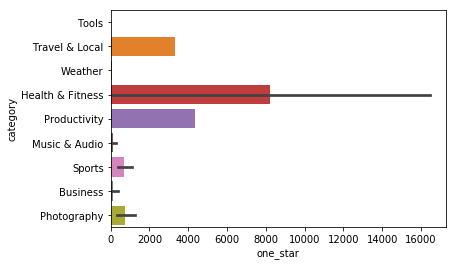

In [9]:
#plot bat chart of ones star rates vs the category
sns.barplot(data=play_data[:200], x='one_star' ,y='category')

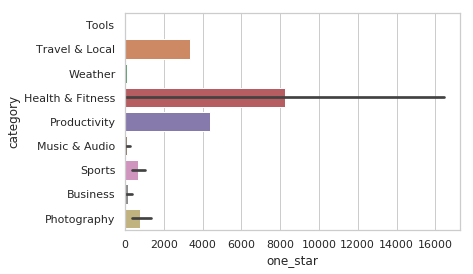

In [11]:
#plot bat chart of ones star rates vs the category and add a whitegrid
sns.barplot(data=play_data[:200], x='one_star' ,y='category')
sns.set(style='whitegrid')

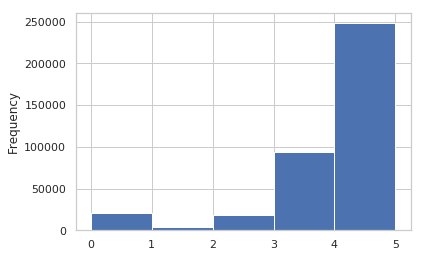

In [12]:
#Plot the frequency of ratings
play_data.rating.plot.hist(bins=5)

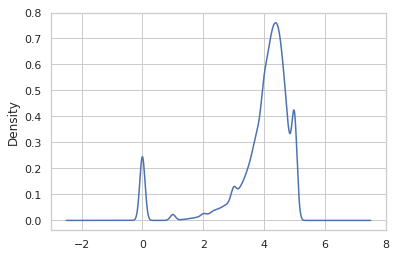

In [13]:
#Plot density of ratings
play_data.rating.plot.density()

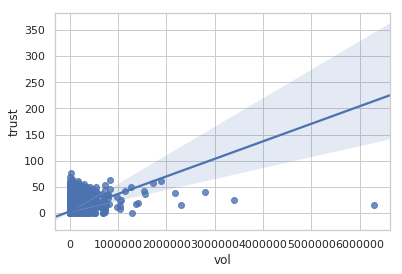

In [14]:
#Create a reglot
sns.regplot('vol' ,'trust', maj_data)

/home/n/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/n/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


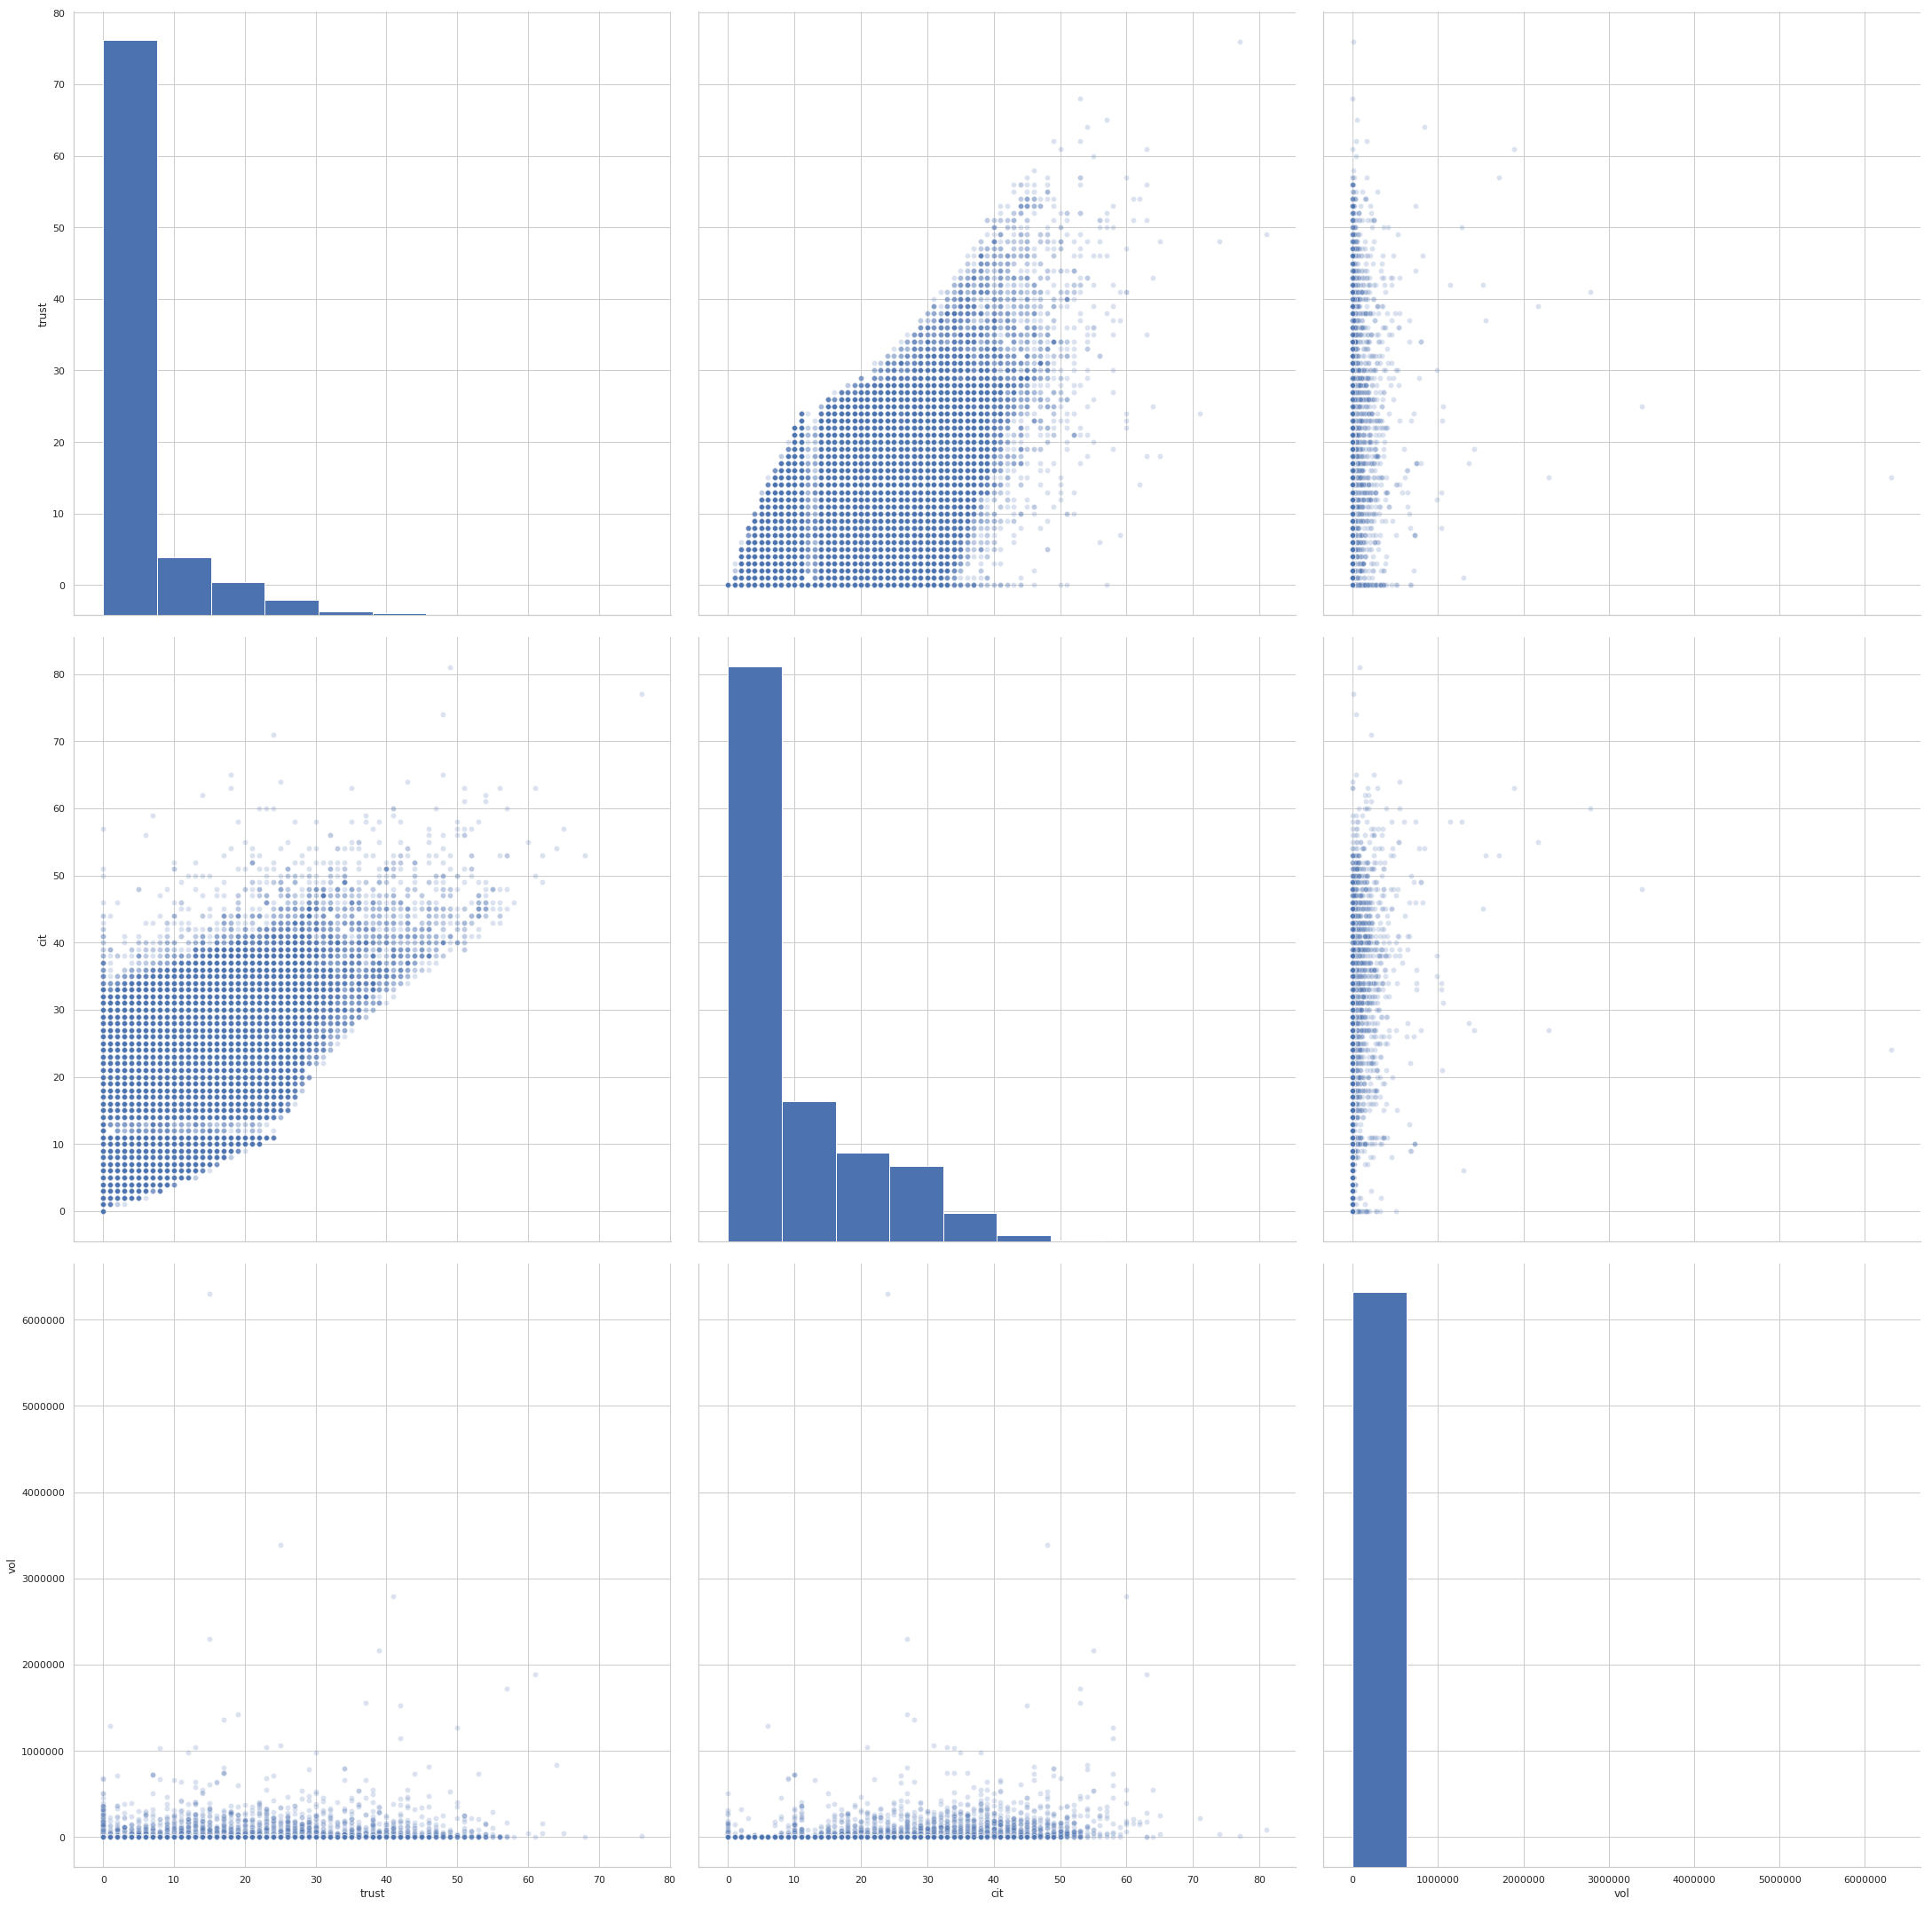

In [15]:
#Draw a pairplot and change the figures dimensions, change the alpha so that you can see density
sns.pairplot(maj_data, plot_kws={'alpha':0.2}, height=10, aspect=1)